# CP 3 Aprendizaje de Máquinas
---
## Árboles de Decisión y Random Forest

### Ejercicio 1: Iris 

To demonstrate the use of a decision tree classifier we use the Iris data set.

Load the Iris data set

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

The Iris data set has four features (sepal length, sepal width, petal length, petal width) which can be used to classify Iris flowers into three species denoted as "0", "1", "2" (setosa, versicolor, virginica)

In [4]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_names'] = df.species
# df.replace({'species_names':{
#             0:iris['target_names'][0],
#             1:iris['target_names'][1],
#             2:iris['target_names'][2]            
#         }}, inplace=True)
df.columns = [item.replace(' (cm)', '') for item in df.columns]
df.head()

,sepal length,sepal width,petal length,petal width,species,species_names
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [5]:
#Data points count value for each class labels..

df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

The scatter plot shows the three species of Iris in different colors plotted with the petal length and petal width on the y axis

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Iris species')

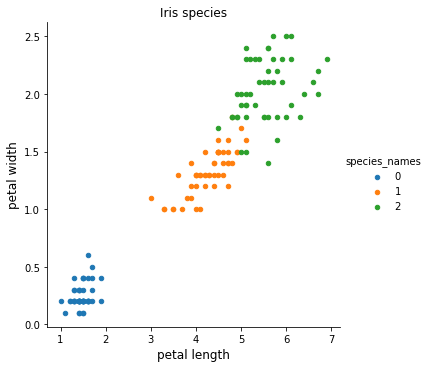

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'axes.titlesize': 'large'})
g = sns.FacetGrid(df, hue='species_names', size=5)
g.map(plt.scatter, 'petal length', 'petal width', s=20)
g.add_legend()
g.fig.gca().set_title('Iris species')

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.3)

### Ejercicio 3: Iris con Random Forest

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test,y_test)

0.9555555555555556

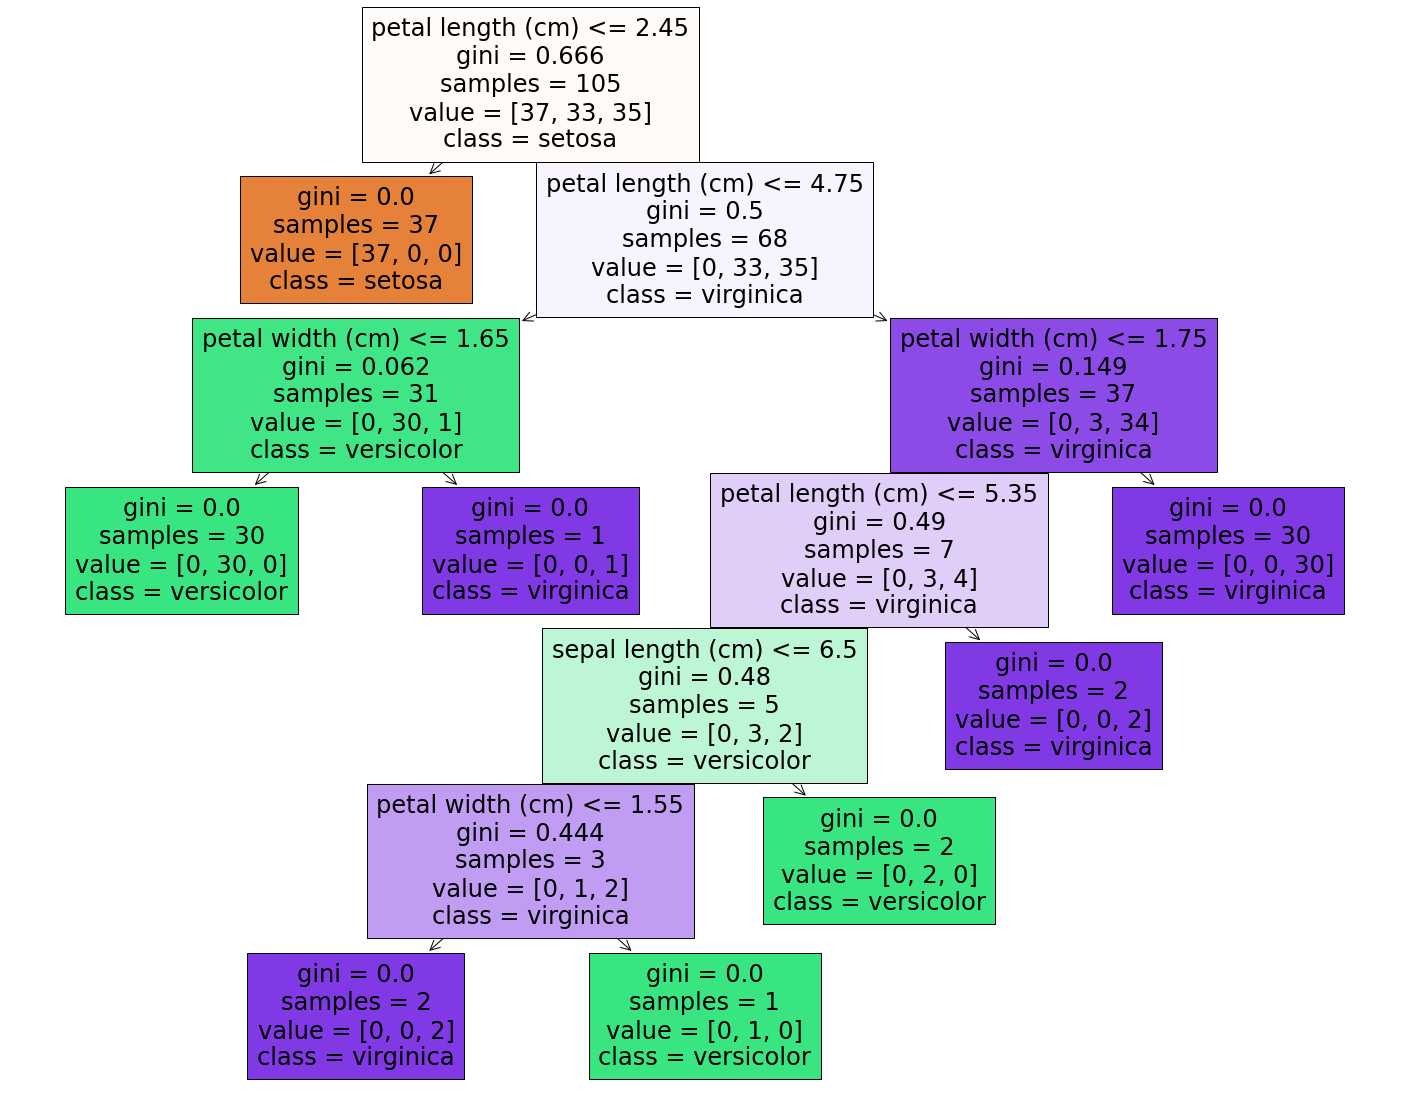

In [9]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

### Ejercicio 3: Iris con Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_clf.score(X_test,y_test)

0.9555555555555556

### Ejercicio 4: Espacios de Decision

In [12]:
import numpy as np
%matplotlib inline
from matplotlib.colors import ListedColormap

In [24]:
plt.rcParams.update({'figure.titlesize': 'large'})
step = 0.04

def mesh_plot(x, y, species, ax, clf):
    values = species.unique()
    colors = sns.color_palette()[:len(values)]
    xx, yy = np.meshgrid(
        np.arange(x.min() - 0.1, x.max() + 0.1, step),
        np.arange(y.min() - 0.1, y.max() + 0.1, step))
    mesh_predict = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh_predict = mesh_predict.reshape(xx.shape)
    for i in range(len(colors)):
        ax.scatter(x[df.species == values[i]], y[df.species == values[i]], color=colors[i])
        ax.set_xlim(x.min() - 0.2, x.max() + 0.2)
        ax.set_ylim(y.min() - 0.2, y.max() + 0.2)
    ax.pcolormesh(xx, yy, mesh_predict,
        cmap=ListedColormap(sns.color_palette()[:3]), alpha=0.2, shading='auto')

In [33]:
def plot_features(df, feat1, feat2, clsf, ax):
    X = df[[feat1, feat2]]
    y = df.species
    fit_clsf = clsf().fit(X, y)
    ax.set(xlabel=feat1, ylabel=feat2)
    mesh_plot(df[feat1], df[feat2], df.species, ax, fit_clsf) 
    

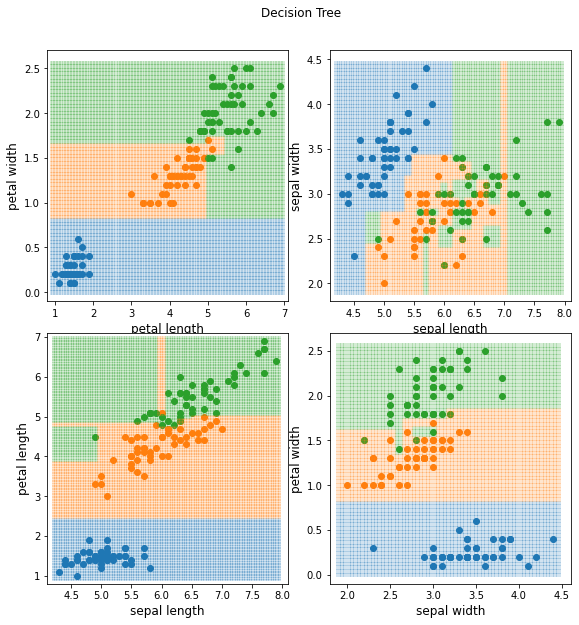

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout()
fig.suptitle('Decision Tree', y=1.05)

plot_features(df, 'petal length', 'petal width', DecisionTreeClassifier, ax1)
plot_features(df, 'sepal length', 'sepal width', DecisionTreeClassifier, ax2)
plot_features(df, 'sepal length', 'petal length', DecisionTreeClassifier, ax3)
plot_features(df, 'sepal width', 'petal width', DecisionTreeClassifier, ax4)

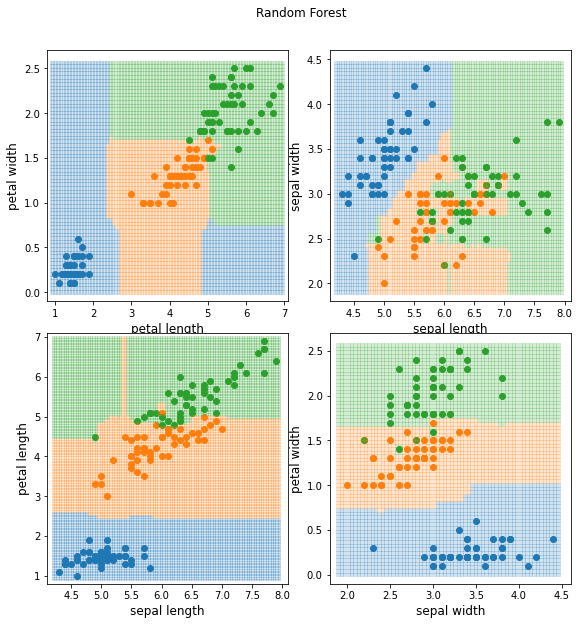

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout()
fig.suptitle('Random Forest', y=1.05)

plot_features(df, 'petal length', 'petal width', RandomForestClassifier, ax1)
plot_features(df, 'sepal length', 'sepal width', RandomForestClassifier, ax2)
plot_features(df, 'sepal length', 'petal length', RandomForestClassifier, ax3)
plot_features(df, 'sepal width', 'petal width', RandomForestClassifier, ax4)

### Ejercicio 5: DT y RF con Rotten Tomatoes

In [ ]:
import os
from pathlib import Path
from typing import List
from sklearn.feature_extraction.text import CountVectorizer 

In [ ]:
path_p = Path("txt_sentoken/pos")
path_n = Path("txt_sentoken/neg")

ds_p = list(path_p.iterdir())     # directorio donde están las críticas positivas
ds_n = list(path_n.iterdir())     # directorio donde están las críticas negativas

def convert_file_to_text(file_path: Path) -> str:
    text = []
    f = open(file_path)
    for line in f.readlines():
        text += line
    return ''.join(text)
    
texts_p = []    # Lista de críticas positivas
texts_n = []    # Lista de críticas negativas

for file in ds_p:
    texts_p.append(convert_file_to_text(file))
    
for file in ds_n:
    texts_n.append(convert_file_to_text(file))

In [ ]:
vectorizer = CountVectorizer()
mt = vectorizer.fit_transform(texts_p + texts_n)
mta = mt.toarray()

y = [1]*1000 + [0]*1000

X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(mta, y, train_size=0.60)

In [ ]:
rt_dt = DecisionTreeClassifier()
rt_dt.fit(X_train_rt, y_train_rt)
rt_dt.score(X_test_rt,y_test_rt)

In [ ]:
rt_rf = RandomForestClassifier()
rt_rf.fit(X_train_rt, y_train_rt)
rt_rf.score(X_test_rt,y_test_rt)